# Deep Neural Networks

In [152]:
import tensorflow        as tf
import numpy             as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 1
%aimport nn_model
%aimport create_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [172]:
def rescale(x):
    return (x-x.mean())/np.sqrt(x.var(x))

def shuffle_along_axis(a, axis):
    idx = np.random.rand(*a.shape).argsort(axis=axis)
    return np.take_along_axis(a,idx,axis=axis)

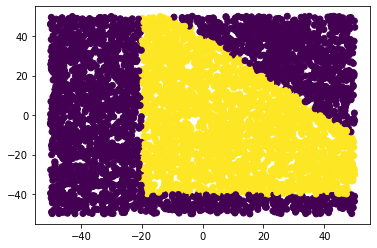

In [185]:
# number of data
N = 5000
# box size
B = 100

# random seed for reproducibility
np.random.seed(20220307)

x = create_data.sample_data(N, B)
y = create_data.assign_label(x)

plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [174]:
train_frac = 0.7

N_train = int(N*train_frac)

training_data, training_labels = np.copy(x[0:N_train]), np.copy(y[0:N_train])
test_data,     test_labels     = np.copy(x[N_train:]),  np.copy(y[N_train:])

print(f"N_train :\t{training_data.shape[0]}\nN_test  :\t{test_data.shape[0]}")

N_valid = 500

x_train, y_train = np.copy(training_data[N_valid:]),  np.copy(training_labels[N_valid:])
x_valid, y_valid = np.copy(training_data[0:N_valid]), np.copy(training_labels[0:N_valid])

print(f"N_train :\t{x_train.shape[0]} \nN_valid :\t{x_valid.shape[0]}")

N_train :	3500
N_test  :	1500
N_train :	3000 
N_valid :	500


In [176]:
architecture = [x.shape[1], 5, 1]
input_dim  = architecture[0]
hidden_activation = "relu"
output_activation = "sigmoid"
name="broken network"

network = nn_model.NN(
    input_dim         = input_dim,
    architecture      = architecture,
    hidden_activation = hidden_activation,
    output_activation = output_activation,
    nn_name           = name,
)

network.summary()

network.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

Model: "broken network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 2)]               0         
                                                                 
 hidden_0 (Dense)            (None, 5)                 15        
                                                                 
 output_layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [177]:
minibatch = 100
N_epochs  = 300

fit = network.fit(
    x_train, y_train,
    epochs          = N_epochs,
    batch_size      = minibatch,
    validation_data = (x_valid, y_valid),
    verbose         = 0,
)

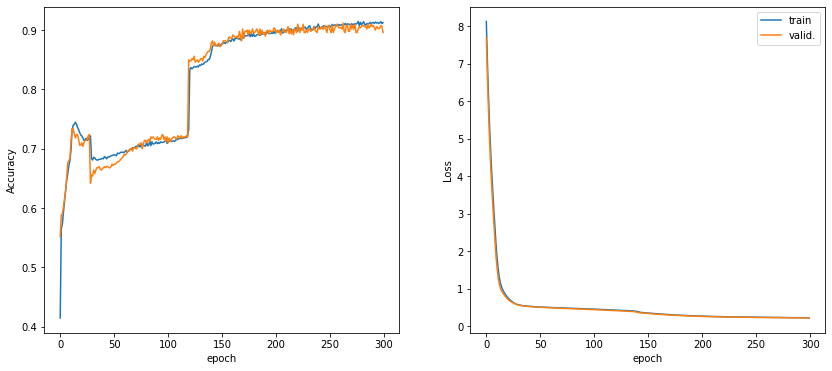

In [178]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

ax[0].plot(fit.history['accuracy'],label="train")
ax[0].plot(fit.history['val_accuracy'],label="valid.")
ax[0].set_xlabel('epoch')
ax[0].set_ylabel("Accuracy")

ax[1].plot(fit.history['loss'],label="train")
ax[1].plot(fit.history['val_loss'],label="valid.")
ax[1].set_xlabel('epoch')
ax[1].set_ylabel("Loss")
ax[1].legend()

plt.show()

In [182]:
test = network.evaluate(
    test_data, test_labels,
    batch_size      = minibatch,
    verbose         = 0,
)

print("test loss, test acc:", test)

test loss, test acc: [0.22574383020401, 0.9153333306312561]


In [183]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
        
# print(len(X1),len(grid))
# print(grid[-1])

# RESCALE

#grid_r = grid/50

[[-1.   -1.  ]
 [-0.96 -1.  ]
 [-0.92 -1.  ]
 ...
 [ 0.92  1.  ]
 [ 0.96  1.  ]
 [ 1.    1.  ]]


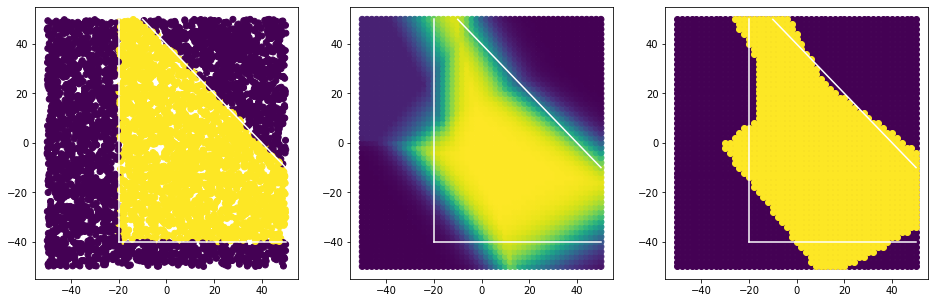

In [186]:
pred = network.predict(grid)

def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=452e6836-b7b8-455e-80d9-d4109b6baddf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>